In [4]:
import os
import csv
import sys
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [5]:
ll ../results/epoch*

-rw-r--r--@ 1 nick  staff  2813 Apr 21 22:56 ../results/epoch-results-CB_0-AR-125_222_24_25_1e-06_256_32.csv
-rw-r--r--@ 1 nick  staff  1182 Apr 21 22:56 ../results/epoch-results-CB_0-AR-30_222_24_10_1e-06_32_512.csv
-rw-r--r--@ 1 nick  staff  2843 Apr 21 22:56 ../results/epoch-results-CB_0-AR-30_222_24_25_1e-06_32_512.csv
-rw-r--r--@ 1 nick  staff  2686 Apr 21 22:56 ../results/epoch-results-CB_0-AR-30_222_24_25_1e-06_64_256.csv
-rw-r--r--@ 1 nick  staff  2257 Apr 21 22:56 ../results/epoch-results-CB_0-AR-60_222_24_20_1e-06_128_128.csv
-rw-r--r--@ 1 nick  staff  2660 Apr 21 22:56 ../results/epoch-results-CB_0-AR-60_222_24_25_1e-06_128_128.csv
-rw-r--r--@ 1 nick  staff  2694 Apr 21 22:56 ../results/epoch-results-CB_1-AR-30_222_24_25_1e-06_32_512.csv
-rw-r--r--@ 1 nick  staff  2682 Apr 21 22:56 ../results/epoch-results-CB_2-AR-30_222_24_25_1e-06_32_512.csv
-rw-r--r--@ 1 nick  staff  2671 Apr 21 22:56 ../results/epoch-results-CB_3-AR-30_222_24_25_1e-06_32_512.csv
-rw-r--r--@ 1 nick  staff

In [13]:
# results_file = '../results/epoch-results-CB_0-AR-125_222_24_25_1e-06_256_32.csv'
# results_file = '../results/epoch-results-CB_0-AR-60_222_24_25_1e-06_128_128.csv'
results_file = '../results/epoch-results-PMB_0-AR-60_222_24_20_1e-06_128_128.csv'
df = pd.read_csv(results_file)
df

,epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,epoch_time,epoch_saved
0,1,0.002528,0.856194,0.001338,0.931207,998.433037,True
1,2,0.000862,0.955901,0.000831,0.957353,1001.805719,True
2,3,0.000582,0.971777,0.000652,0.965392,999.192853,True
3,4,0.000472,0.977447,0.000560,0.971653,999.196631,True
4,5,0.000410,0.980276,0.000523,0.973430,999.413069,True
5,6,0.000364,0.983026,0.000490,0.974530,999.510103,True
6,7,0.000334,0.984587,0.000496,0.975377,997.585871,False
7,8,0.000307,0.985866,0.000471,0.977153,998.810039,True
8,9,0.000286,0.986511,0.000447,0.977915,998.867931,True
9,10,0.000268,0.986998,0.000458,0.977915,997.370272,False


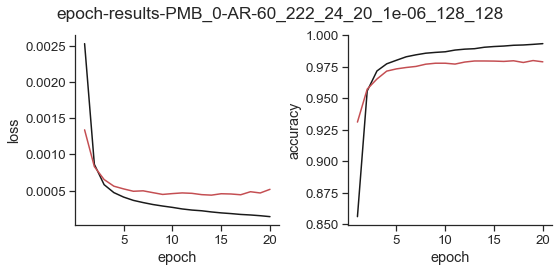

In [14]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,4))

suptitle = os.path.split(results_file)[-1].split('.')[0]

plt.suptitle(suptitle)

for i, key in enumerate(['loss', 'accuracy']):
    
    plt.subplot(1,2,i+1)
    
    plt.plot(df['epoch'], df[f'train_{key}'], 'k-')
    plt.plot(df['epoch'], df[f'valid_{key}'], 'r-')
    
    plt.xlabel('epoch')
    plt.ylabel(key)
    sns.despine()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'../figures/training_performance_{suptitle}.pdf')

In [15]:
np.argmin(df['valid_loss'])

13